# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

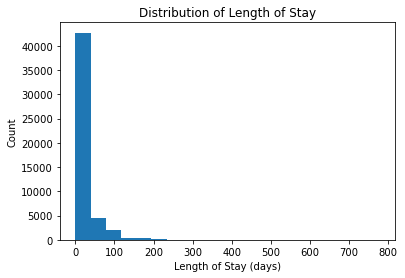

In [8]:
# Plot the distribution of the length of stay
import matplotlib.pyplot as plt
plt.hist(df['length_of_stay'], bins=20)
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.title('Distribution of Length of Stay')
plt.show()

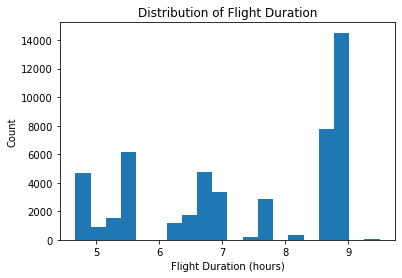

In [9]:
# Plot the distribution of the flight duration
plt.hist(df['flight_duration'], bins=20)
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Count')
plt.title('Distribution of Flight Duration')
plt.show()

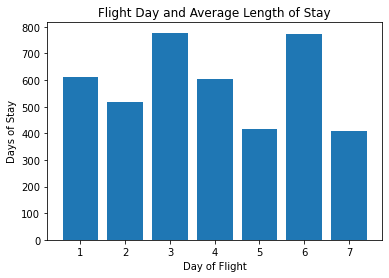

In [10]:
#Visualising the Flight Day and Lenght of Stay
import matplotlib.pyplot as plt
plt.bar(df['flight_day'],df['length_of_stay'])
plt.title("Flight Day and Average Length of Stay")
plt.xlabel("Day of Flight")
plt.ylabel("Days of Stay")
plt.show()

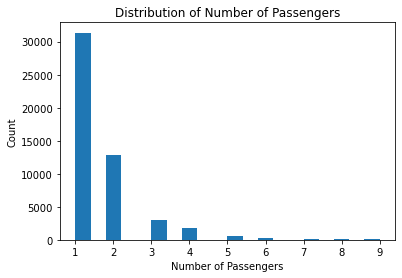

In [11]:
# Plot the distribution of the number of passengers
plt.hist(df['num_passengers'], bins=20)
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Distribution of Number of Passengers')
plt.show()

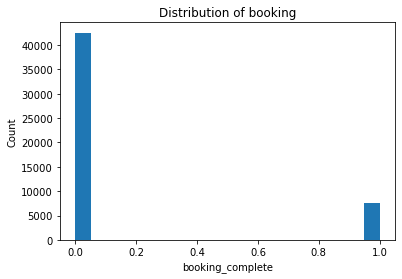

In [12]:
#Plot the distribution of the booking_complete
plt.hist(df['booking_complete'], bins=20)
plt.xlabel('booking_complete')
plt.ylabel('Count')
plt.title('Distribution of booking')
plt.show()

In [8]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

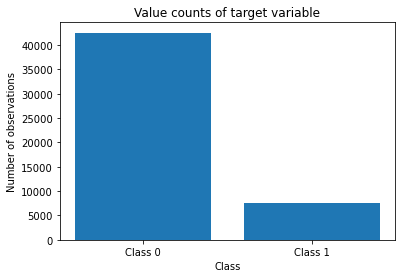

In [14]:
import matplotlib.pyplot as plt

values = [42522, 7478]
labels = ['Class 0', 'Class 1']

plt.bar(labels, values)
plt.title('Value counts of target variable')
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.show()

In [9]:
df.shape

(50000, 14)

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns

In [11]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

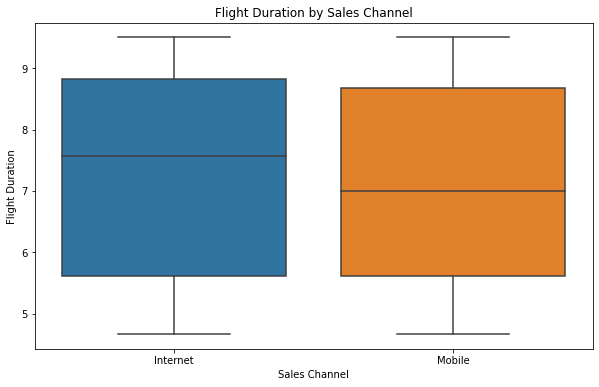

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_channel', y='flight_duration', data=df)
plt.title("Flight Duration by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Flight Duration")
plt.show()

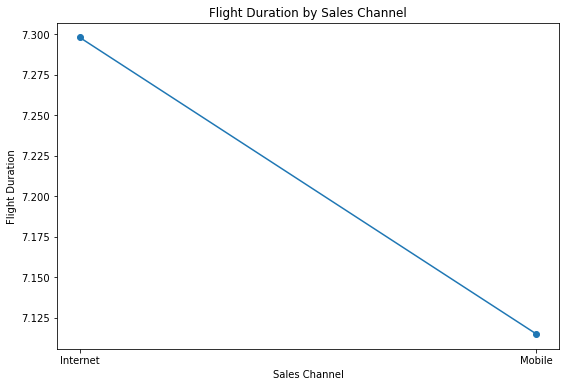

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.plot(df.groupby('sales_channel')['flight_duration'].mean(), marker='o')
plt.title("Flight Duration by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Flight Duration")
plt.show()

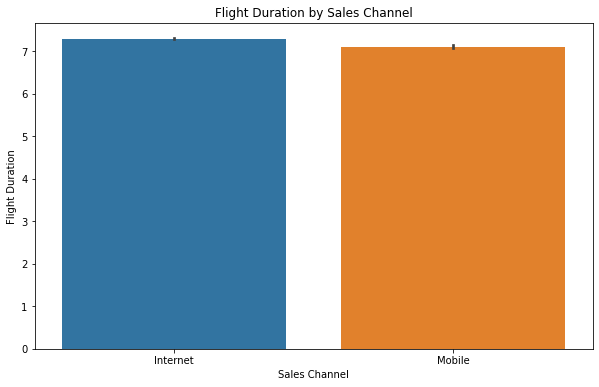

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='flight_duration', data=df)
plt.title("Flight Duration by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Flight Duration")
plt.show()

In [12]:
df['flight_duration'].nunique()

21

In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

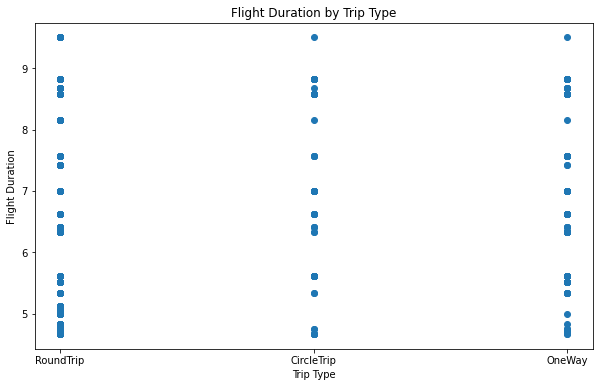

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['trip_type'], df['flight_duration'])
plt.title("Flight Duration by Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Flight Duration")
plt.show()

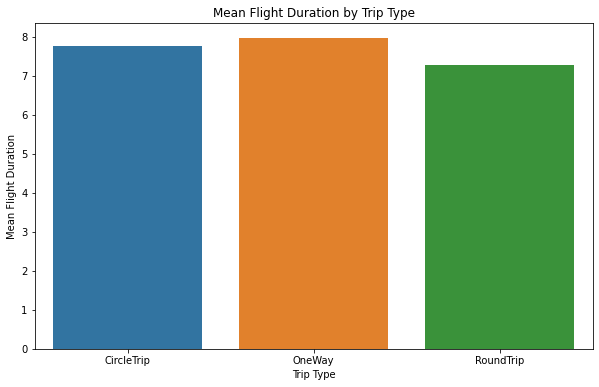

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by trip type and calculate the mean flight duration for each trip type
grouped_data = df.groupby('trip_type')['flight_duration'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_type', y='flight_duration', data=grouped_data)
plt.title("Mean Flight Duration by Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Mean Flight Duration")
plt.show()

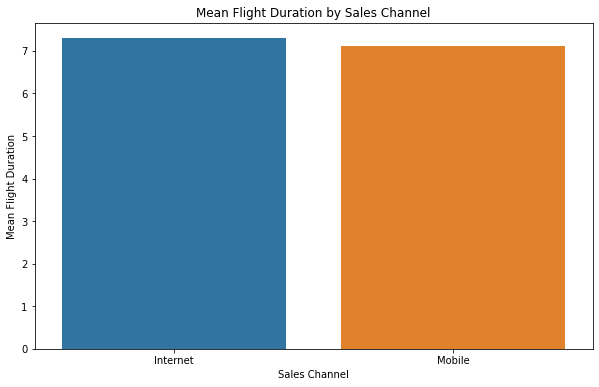

In [25]:
# Group the data by sales channel and calculate the mean flight duration for each sales channel
grouped_data = df.groupby('sales_channel')['flight_duration'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='flight_duration', data=grouped_data)
plt.title("Mean Flight Duration by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Mean Flight Duration")
plt.show()

In [14]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [27]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [15]:
num_routes = df['route'].nunique()
print(f"Number of unique routes: {num_routes}")

Number of unique routes: 799


In [16]:
route_freq = df['route'].value_counts()
print(route_freq)

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64


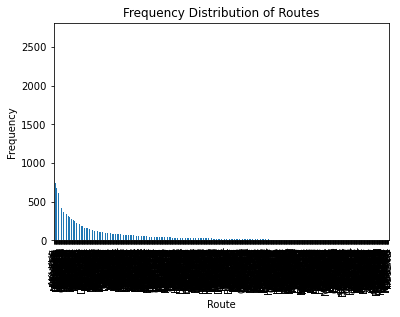

In [30]:
import matplotlib.pyplot as plt

route_freq.plot(kind='bar')
plt.title("Frequency Distribution of Routes")
plt.xlabel("Route")
plt.ylabel("Frequency")
plt.show()

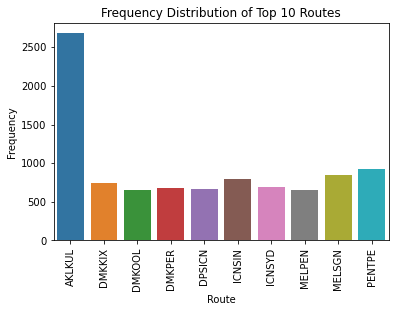

In [31]:
import seaborn as sns

sns.countplot(x='route', data=df[df['route'].isin(df['route'].value_counts().head(10).index)])
plt.title("Frequency Distribution of Top 10 Routes")
plt.xlabel("Route")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

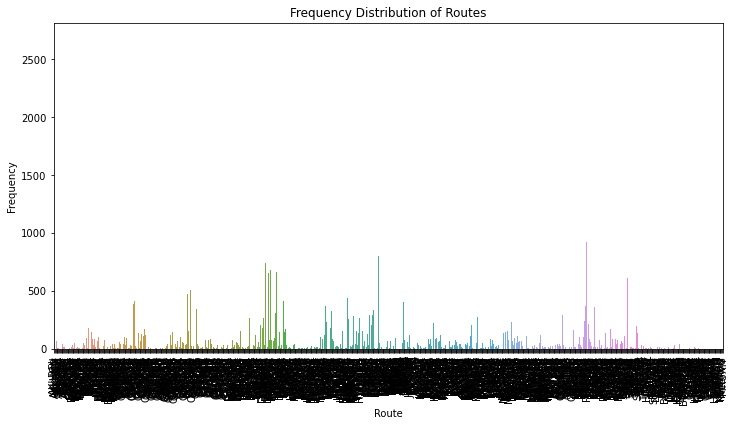

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='route', data=df)
plt.title("Frequency Distribution of Routes")
plt.xlabel("Route")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

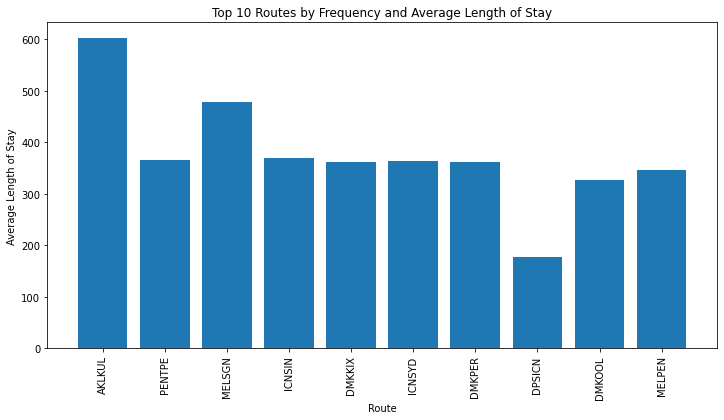

In [33]:
top_10_routes = df['route'].value_counts().head(10)
top_10_routes_df = pd.DataFrame({'route': top_10_routes.index, 'count': top_10_routes.values})

top_10_routes_df = top_10_routes_df.merge(df[['route', 'length_of_stay']], on='route', how='inner')
plt.figure(figsize=(12, 6))
plt.bar(top_10_routes_df['route'], top_10_routes_df['length_of_stay'])
plt.title("Top 10 Routes by Frequency and Average Length of Stay")
plt.xlabel("Route")
plt.ylabel("Average Length of Stay")
plt.xticks(rotation=90)
plt.show()

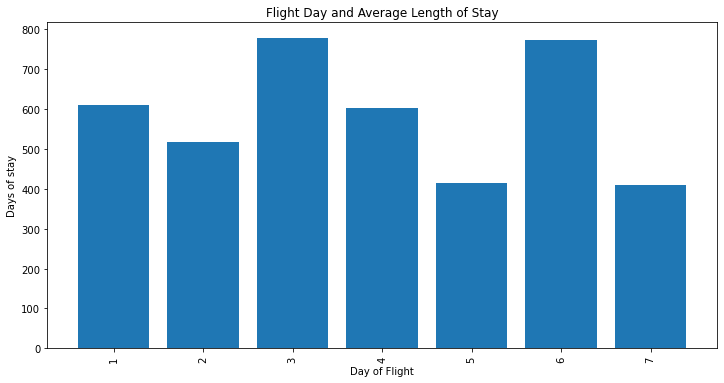

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(df['flight_day'],df['length_of_stay'])
plt.title("Flight Day and Average Length of Stay")
plt.xlabel("Day of Flight")
plt.ylabel("Days of stay")
plt.xticks(rotation=90)
plt.show()

In [35]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [17]:
num_origins = df['booking_origin'].nunique()
print(f"Number of unique booking origins: {num_origins}")

Number of unique booking origins: 104


In [18]:
booking_origin_freq = df['booking_origin'].value_counts()
print(booking_origin_freq)

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64


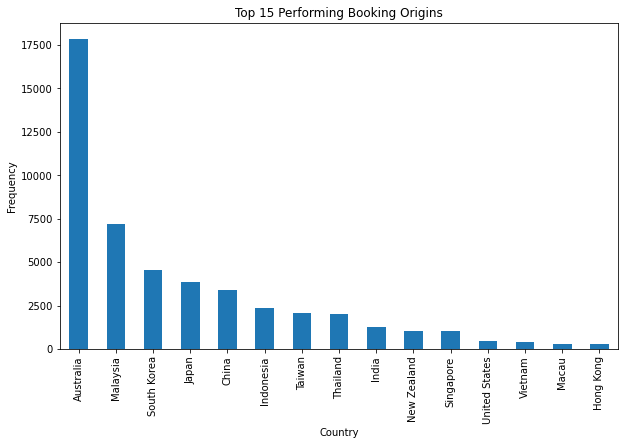

In [38]:
top_booking_origin_freq = df['booking_origin'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_booking_origin_freq.plot.bar()
plt.title('Top 15 Performing Booking Origins')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

In [39]:
df_filtered = df[df['booking_origin'].isin(df['booking_origin'].value_counts()[df['booking_origin'].value_counts() > 1000].index)]

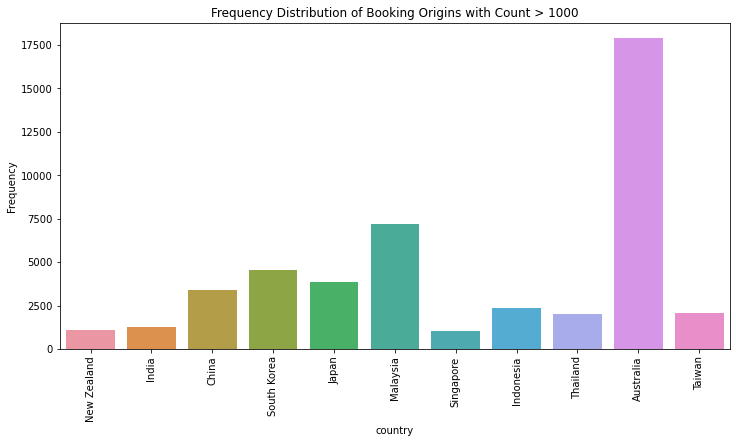

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='booking_origin', data=df_filtered)
plt.title("Frequency Distribution of Booking Origins with Count > 1000")
plt.xlabel("country")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [20]:
df['wants_extra_baggage'].unique()

array([1, 0], dtype=int64)

In [21]:
df['wants_preferred_seat'].unique()

array([0, 1], dtype=int64)

In [22]:
df['wants_in_flight_meals'].unique()

array([0, 1], dtype=int64)

In [23]:
df['booking_complete'].unique()

array([0, 1], dtype=int64)

In [24]:
df['flight_hour'].unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21], dtype=int64)

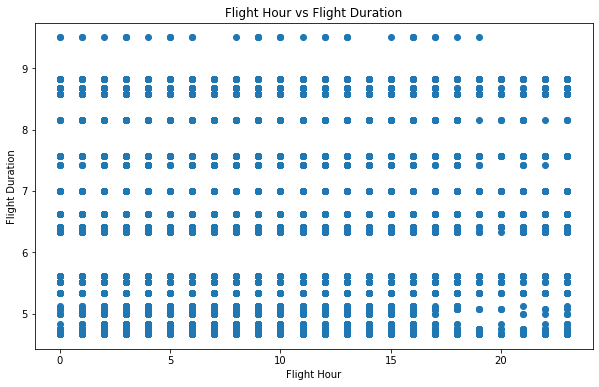

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['flight_hour'], df['flight_duration'])
plt.title("Flight Hour vs Flight Duration")
plt.xlabel("Flight Hour")
plt.ylabel("Flight Duration")
plt.show()

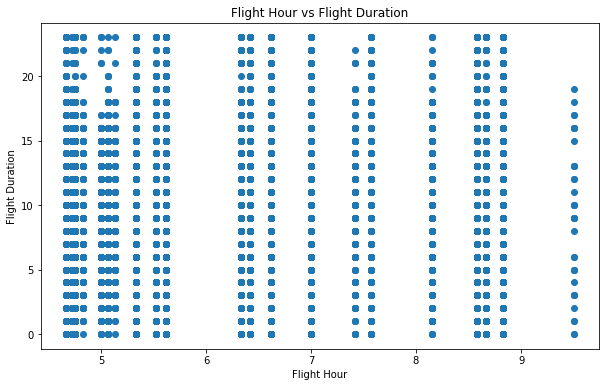

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['flight_duration'],df['flight_hour'])
plt.title("Flight Hour vs Flight Duration")
plt.xlabel("Flight Hour")
plt.ylabel("Flight Duration")

plt.show()

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [25]:
df['purchase_lead'].unique()

array([262, 112, 243,  96,  68,   3, 201, 238,  80, 378, 185,   8, 265,
       245, 192, 259,  19,  67, 351, 228,  21,  23,  25,  16,  66,  51,
        37, 101,   7,   5,  33,  20,  56,  13,  71, 346,   9,  65, 221,
       107,  14,  77,  24,  47,  22,  11,  35, 272, 250, 161, 128, 190,
       311,  27, 314, 102,   2,  26,  32,  57, 198, 120,  69, 281, 282,
        15,  31, 316, 232, 156, 196, 283,  34,  63,   6, 227, 181, 138,
       134,  85,  93, 118,  90, 168, 127,  18, 153, 186, 263, 172, 230,
        42,  81, 140, 285, 179, 341, 173, 180, 366, 229, 174,  82,  75,
       163, 105, 276, 110,  83, 154,  55,  45,  54, 193,  10, 166,  97,
       239, 182,  99,  53,  28, 384,  70, 126, 142,  87,  86, 313,  41,
        91, 206, 197, 268, 157, 145, 241, 139,  59, 396, 280,  79, 380,
       132, 121, 419,  58, 115, 236, 225, 116, 191, 275, 417, 159,  92,
       106, 218, 295,  12, 305, 235, 332, 125, 204, 310, 368, 169, 214,
       155, 325, 130, 189, 226, 122,  88, 211, 188, 129, 149,  3

In [26]:
df['purchase_lead'].mean()

84.94048

In [27]:
df['purchase_lead'].median()

51.0

In [28]:
df['purchase_lead'].std()

90.45137813436357

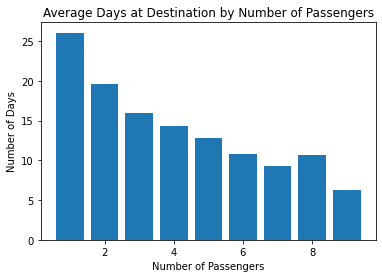

In [54]:
import matplotlib.pyplot as plt

# group data by number of passengers and calculate mean length of stay
grouped = df.groupby('num_passengers')['length_of_stay'].mean()

# plot the results
plt.bar(grouped.index, grouped.values)
plt.title('Average Days at Destination by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Days')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder to the 'sales_channel' column and transform it
df['sales_channel'] = le.fit_transform(df['sales_channel'])

# fit the encoder to the 'trip_type' column and transform it
df['trip_type'] = le.fit_transform(df['trip_type'])

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,2,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [34]:
# Drop the 'route' and 'booking_origin' columns
df = df.drop(['route', 'booking_origin'], axis=1)

In [35]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [36]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)

In [39]:
# Instantiate the model
rf_classifier = RandomForestClassifier()

In [41]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV
# Grid search for best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [42]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [44]:
# Evaluate the model
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8459
           1       0.95      0.86      0.90      8550

    accuracy                           0.91     17009
   macro avg       0.91      0.91      0.91     17009
weighted avg       0.91      0.91      0.91     17009



In [47]:
print('Precision Score:', precision_score(y_test, y_pred))
print('Test accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('ROC AUC Score:',roc_auc_score(y_test, y_pred))

print('Classification report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Precision Score: 0.948721244056034
Test accuracy: 0.9078723028984655
Recall Score: 0.863391812865497
F1 Score: 0.9040475169922233
ROC AUC Score: 0.9081115584010663
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8459
           1       0.95      0.86      0.90      8550

    accuracy                           0.91     17009
   macro avg       0.91      0.91      0.91     17009
weighted avg       0.91      0.91      0.91     17009

Confusion matrix:
[[8060  399]
 [1168 7382]]


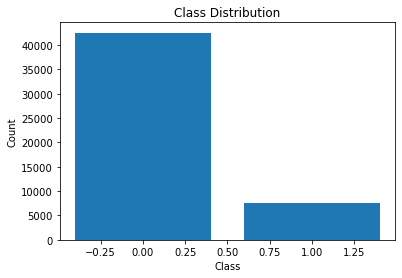

0    0.85044
1    0.14956
Name: booking_complete, dtype: float64


In [48]:
# Calculate class distribution
class_dist = df['booking_complete'].value_counts()

# Plot class distribution
plt.figure(figsize=(6,4))
plt.bar(class_dist.index, class_dist.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate class imbalance
class_imbalance = class_dist / class_dist.sum()

# Print class imbalance
print(class_imbalance)

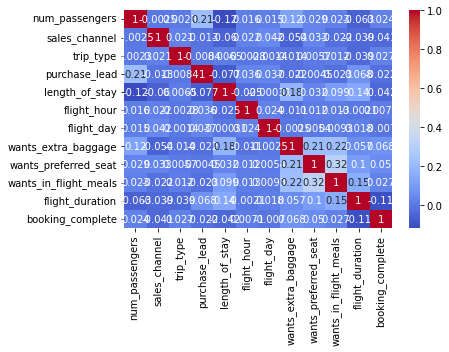

In [49]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

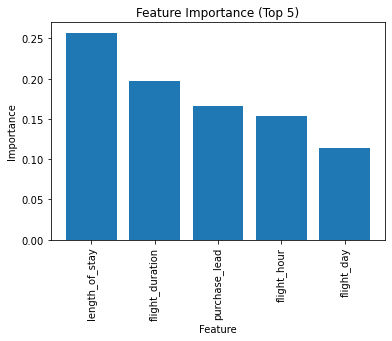

In [52]:
# Get the feature importance scores
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a sorted list of the feature importance scores and feature names
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Extract the top 5 most important features
top_n = 5
top_importances = sorted_importances[:top_n]

# Create a bar plot of the top 4 most important features
plt.bar([x[1] for x in top_importances], [x[0] for x in top_importances])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Top 5)")
plt.xticks(rotation=90)
plt.show()

In [53]:
#the below code is to check if the columns 'route' & 'booking_origin' have influence on the model's performance

In [77]:
import pandas as pd

# convert route column to one-hot encoding
route_encoded = pd.get_dummies(df['route'])

# convert booking_origin column to one-hot encoding
booking_origin_encoded = pd.get_dummies(df['booking_origin'])

# drop the original columns
df = df.drop(['route', 'booking_origin'], axis=1)

# join the encoded columns with the original dataframe
df = df.join(route_encoded)
df = df.join(booking_origin_encoded)

In [79]:
df.shape

(50000, 915)